# The Solow model with land

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
from sympy import Symbol
from sympy.solvers import solve
sm.init_printing(use_unicode=True) # for pretty printing
from IPython.display import display
import matplotlib.pyplot as plt # baseline modul
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The **Solow model with land** contains:

* $K_t$ is capital
* $L_t$ is labor
* $A_t$ is technology
* $X$ is land
* $Y_t = F(K_t,A_tL_t,X)$ is GDP

**GDP** is defined as

$ Y_{t}=K_{t}^{\alpha}(A_{t}L_{t})^{\beta}X^{\kappa}$

**Saving** is a constant fraction of GDP

$ S_t = sY_t,\, s\in(0,1) $

such that **capital accumulates** according to

$ K_{t+1}=sY_t+(1-\delta)K_t $

**Labour and technology accoumulates** as

$ L_{t+1} = (1+n)L_t $

$ A_{t+1} = (1+g)A_t $

The transition equation then normally becomes

$ \tilde{k}_{t+1}= \frac{1}{(1+n)(1+g)}[\tilde{k}_{t}^{\alpha}(\frac{X}{A_tL_t})^\kappa+(1-\delta)\tilde{k}_{t}] $

where $\tilde{k}_{t}= \dfrac{K_t}{A_tL_t}$

But in this case we need to look at the capital-output ratio, so the **transition equation** becomes

$ z_{t+1} = \frac{K_{t+1}}{Y_{t+1}} = \frac{K_{t+1}}{K_{t+1}^{\alpha}(A_{t+1}L_{t+1})^{\beta}X^{\kappa}} = \frac{K_{t+1}^{1-\alpha}}{(A_{t+1}L_{t+1})^{\beta}X^{\kappa}} \rightarrow z_{t+1} = \frac{1}{((1+g)(1+n))^\beta}(s+z_t(1-\delta))^{1-\alpha}z_t^\alpha$

# Steady state

## Analytical solution

We use **sympy** to find an analytical expression for the steady state, i.e. solve

$$ z^{\ast} = \frac{1}{((1+g)(1+n))^\beta}(s+z^{\ast}(1-\delta))^{1-\alpha}(z^{\ast})^\alpha $$

In [2]:
#We define all symbols
k = sm.symbols('k') #physical capital
X = sm.symbols('X') #land
z = sm.symbols('z') # #physical capital/GDP ratio
alpha = sm.symbols('alpha') #return on physical capital
beta = sm.symbols('beta') #labour force income share
kappa = sm.symbols('kappa') #return on land
delta = sm.symbols('delta') #depreciation rate on capital
s = sm.symbols('s') #savings/investment rate
g = sm.symbols('g') #growth in technology
n = sm.symbols('n') #growth in labour force

In [3]:
#z_trans = sm.Eq(((s+z*(1-delta))**(1-alpha)*z**alpha)/((1+g)*(1+n))**beta, z)
#z_trans

In [4]:
#Then we define the steady state equations
ss1 = sm.Eq(((s+z*(1-delta))**(1-alpha))*z**alpha/(((1+n)*(1+g))**beta), z)
ss1

In [5]:
#KAN MÅSKE SLETTES, DA VI IKKE HAR TO LIGNINGER?
#We solve the steady state equations for z
sss1 = sm.solve((ss1), z, implicit = True)
sss1


When using $ 1 - \alpha = \beta + \kappa $, this can be reduced to:

$$ z_t = z = z^{\ast} = \frac{s}{((1+g)(1+n))^\frac{\beta}{\beta+\kappa}-(1-\delta)} $$

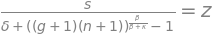

In [6]:
zss = sm.Eq(s/(((1+g)*(1+n))**(beta/(beta+kappa))-(1-delta)),z)
zss

In [7]:
#We turn the solution into a Python funciton
ss_func = sm.lambdify((s,g,n,kappa,beta,delta),sss1)

## Numerical solution

We rewrite the equation for the steady state as

$ 0 = \frac{s}{((1+g)(1+n))^\frac{\beta}{\beta+\kappa}-(1-\delta)} -z^{\ast} $


now it is a root-finding problem.

In [8]:
#We define model parameters as plausible empirical values
s = 0.2
g = 0.02
n = 0.01
beta = 2/3
kappa = 1/6
alpha = 1/6
delta = 0.06

In [9]:
#ss_func = sm.lambdify((s,g,n,kappa,beta,delta),zss)

In [10]:
z = 0.2/(((1+0.02)*(1+0.01))**((2/3)/((2/3)+(1/6)))-(1-0.06))
z

In [ ]:
z

In [14]:
#We solve numerically for the steady state:

def z_func(s,g,n,alpha,beta,delta):
    """
    args:
    (float): Investments
    (float): Growth in technology
    (float): Growth in labour force
    (float): Depreciation rate 
    (float): Return on physical capital
    (float): Return on technology*labour 
    : transition equation for z
    """
    result = lambda z: ((s+z*(1-delta))**(1-alpha)*z**alpha)/((1+g)*(1+n))**beta-z
    return optimize.bisect(result, 1, 100, full_output=False)

print(f'z*={z_func(s,g,n,alpha,beta,delta):.3f}')


z*=2.378


As expected, the numerical and analytical steady state values are identical.

# Further analysis

## Phase diagrams

In [15]:
def z_func(s,g,n,alpha,beta,delta,time):
    """
    Args:
    k      (int)  : Physical capital
    alpha  (float): Return on physical capital
    delta  (float): Depreciation rate on capital
    s      (float): Savings/investments
    n      (float): Increase in labour
    B      (int)  : Factor productivity
    time   (int)  : periods
    
    Returns:
    The solow diagram with a diagonal line and the growth path of physical capital"""
    
    #An emty list is made to contain the k values
    z_growth = [z]
    
    #An empty list is made to contain the diagonal line
    diagonal = [0]


    #45 degree line
    for t in range(1,time):
        line = (t*(1-delta))
        diagonal.append(line)

        
    #We generate the growth in capital
    for t in range(1,time):
        z_tp1 = ((s)**(1-alpha)*t**alpha)
        z_growth.append(z_tp1)
    
    #Create the plot
    plt.rcParams['axes.facecolor'] = 'white'
    plt.figure(figsize=(6,6))
    plt.plot(z_growth[:time], label=r'$sBk_t^{\alpha}$', color = 'magenta')
    plt.plot(diagonal[:time], label = r'$(n+\delta)k_t$', color = 'lime')
    plt.xlim(0,time)
    plt.ylim(0,diagonal[-1])
    plt.xlabel('$z_t$')
    plt.legend()
    plt.title('Solow diagram')
    
    return plt.show()

In [16]:
widgets.interact(z_func, 
                z = widgets.fixed(0), 
                alpha = widgets.FloatSlider(description = r'$\alpha$', min = 0, max = 0.9, step = 0.05, value = 0.3),
                delta = widgets.FloatSlider(description = r'$\delta$', min = 0, max = 0.1, step = 0.01, value = 0.01),
                s = widgets.FloatSlider(description = '$s$', min = 0.01, max = 0.8, step = 0.05, value = 0.4),
                n = widgets.FloatSlider(description ='$n$', min = 0.01, max = 0.1, step = 0.005, value = 0.01),
                g = widgets.FloatSlider(description ='$g$', min = 0.02, max = 0.2, step = 0.005, value = 0.02),
                beta = widgets.fixed(2/3),
                time = widgets.IntSlider(description='time', min = 1, max = 1000, step = 10, value = 100))

interactive(children=(FloatSlider(value=0.4, description='$s$', max=0.8, min=0.01, step=0.05), FloatSlider(val…

<function __main__.z_func(s, g, n, alpha, beta, delta, time)>

Here the steady state occurs when the two nullclines intersect as illustrated above. The steady state values in the diagram are consistent with prior numerical and analytical results. 

We wish to see what happens, when the savings rate in human capital rises from its initial value

The new phase diagram shows how the steady state values of both $\tilde{h}$ and $\tilde{k}$ rises as a result of the higher savings rate. The rise in the physical capital per capita, $\tilde{k}$ is caused by the increase in the total savings of physical capital occuring as a result of the higher levels of $Y$ induced by the new, higher value of $H$.

## Golden rule

In [ ]:
#We define model parameters as plausible empirical values
s = 0.2
g = 0.02
n = 0.01
beta = 2/3
kappa = 1/6
alpha = 1/6
delta = 0.06

We know that $\tilde{y}_t^\ast=\tilde{k}_t^{\ast \alpha}\tilde{h}_t^{\ast \varphi}$

In [ ]:
#We define the y steady state function
def y_ss(s,g,n,alpha,kappa,delta,beta):
    """args:
    s     (float): Investments
    g     (float): Growth in technology
    n     (float): Growth in labour force
    delta (float): Depreciation rate 
    kappa (float): dgthf
    alpha (float): Return on physical capital
    beta  (float): Return on technology*labour 
    
    Returns:
    Steady state value for total income
    """
    return ((s/((1+n)*(1+g))**(beta/(beta+kappa))-(1+delta))**(alpha/(beta+kappa)))

print(y_ss(s,g,n,alpha,kappa,delta,beta))



(0.785834632693883+0.570942280631578j)


In [17]:
2.378 ** alpha

In [ ]:
y = 0.785834632693883

In [21]:
#We define the steady state function for c
def c_ss(s,g,n,alpha,kappa,delta,beta):
    """args:
    sh  (  float): Investments in human capital
    sk     float): Investments in physical capital
    g     (float): Growth in technology
    n     (float): Growth in labour force
    alpha (float): Return on physical capital
    phi   (float): return on human capital
    delta (float): depriciation rate
    
    Returns:
    Golden rule for private consumption
    """
    return ((1-s)*(s/((1+n)*(1+g))**(beta/(beta+kappa))-(1+delta))**(alpha/(beta+kappa)))

print(c_ss(s,g,n,alpha,kappa,delta,beta))

(0.6286677061551065+0.4567538245052625j)


In [19]:
c = 0.6286677061551065

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


/var/folders/b7/xr_h9h1s35l0rntn_yj3w_9h0000gn/T/ipykernel_24135/3369762115.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return ((1-s)*(s/((1+n)*(1+g))**(beta/(beta+kappa))-(1+delta))**(alpha/(beta+kappa)))


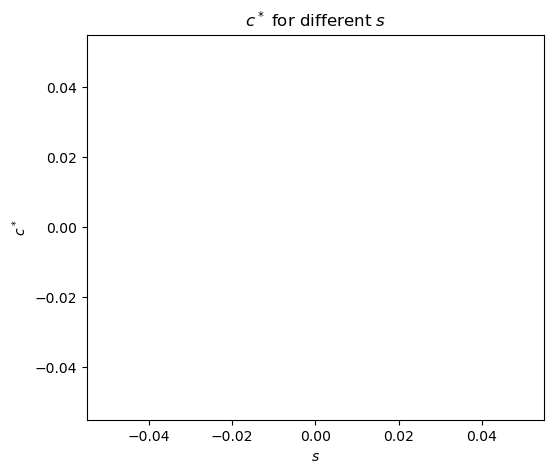

In [24]:
#We create a plot to show the variation in c when sh changes, all things equal

#we make an empty list to collect the differenc c-values
c_values = []
c_x = []

#We loop over different values of s to find the corresponding values of c
for s in np.arange(0.8,0.9,0.001):
    c_values.append(c_ss(s,g,n,alpha,kappa,delta,beta))
    c_x.append(s)

print(c_values)

#Create the plot
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)
ax.plot(c_x,c_values)
ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$c^*$')

#We mark the maximum value of c and the corresponding value of s
#plt.axvline(0.45,ymax=0.95,color='gray',linestyle='--')
#plt.axhline(max(c_values),xmax=1,color='gray',linestyle='--')
ax.set_title('$c^*$ for different $s$');

In [26]:
#We find the largest ss-value of consumption pr. worker
print(f'The maximum private consumption per capita is: {max(c_values):.3f}')

#We find the sh value resulting in the maximum c value
print(f'The golden rule value of s is: {(c_x[c_values.index(max(c_values))])}')

The maximum private consumption per capita is: nan
The golden rule value of s is: 0.8


The optimal savings rate that maximises consumption is thus 0.45, which can be considered to be quite high. It seems that the rise in production caused by the increased savings outweighs the consumption lost due to a higher savings rate.

# Conclusion

Our calculations show that for our parameter values a steady state arises. In the basic Solow model the savings rate affects the steady state value positively. Likewise, the value of $s_H$ has a positive impact on the steady state values of $\tilde{h}^*$ and $\tilde{k}^*$, which is initially caused by a direct change in $\tilde{h}^*$ from which a spillover effect occurs, affecting both $\tilde{k}^*$ and production. Furthermore the consumption maximising value of $s_H$ is found to be $0.45$. The analysis also shows that different solving methods provides the same results in our case.